<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/7-1%20%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

## 패션 MNIST

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


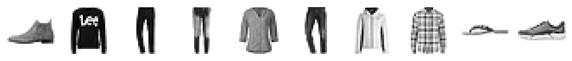

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(test_input[i], cmap='gray_r')  # 0~255, 0: 완전 검정, 255: 완전 흰색이나 _r로 반대로 표시함.
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

10개의 다중분류를 위하여 loss 함수로 categorical_crossentropy함수를 사용하지 않았는데, 이유는? <br> scikit learn에서는 없음. 사이킷에서는 10개의 2진 분류를 수행하고 각 값에 대하여 Z를 구하고 softmax함수에 집어넣어 다중 분류를 수행함. <br> 이런 방식을 OvR(One versus Rest) or OvA(One versus All)이라고 명침함.

In [ ]:
scores = cross_validate(sc,
                        X=train_scaled, y=train_target,
                        n_jobs=-1)

In [ ]:
print(scores['test_score'].mean())

0.8195666666666668


## 인공신경망

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


## 인공신경망으로 모델 만들기

In [ ]:
dense = Dense(10, activation='softmax', input_shape=(784,))
model = Sequential(dense)

## 인공신경망으로 패션 아이템 분류하기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 이진분류 : binary_crossentropy, 다중 분류; categorical_crossentropy 사용 <br>
sparse_categorical\_crossentropy: onehot encoding되지 않은 정수로 된 target값을 사용 하려면 sparse_categorical_crossentropy를 사용하고 (입력값을 정수로 사용) <br> target을 keras.util.to_categorical() 메쏘드를 사용하여 onehot encoding으로 변환하여 사용한다면,  categorical_crossentropy 사용

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4327 - accuracy: 0.8579
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4274 - accuracy: 0.8597
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4235 - accuracy: 0.8598
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4222 - accuracy: 0.8617
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4193 - accuracy: 0.8632


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4497 - accuracy: 0.8477


[0.4497275650501251, 0.8476666808128357]

In [ ]:
model.predict(val_scaled).shape

(12000, 10)